In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [10]:
# Train test split

In [35]:
data_df = pd.read_csv("data/P4_engineered_data.csv")

In [36]:
data_df.columns

Index(['timestamp', 'Phone_pressure', 'Phone_ACC_X', 'Phone_ACC_Y',
       'Phone_ACC_Z', 'Phone_GRAVITY_X', 'Phone_GRAVITY_Y', 'Phone_GRAVITY_Z',
       'Phone_GYRO_X', 'Phone_GYRO_Y', 'Phone_GYRO_Z', 'Phone_LA_X',
       'Phone_LA_Y', 'Phone_LA_Z', 'Phone_MAG_X', 'Phone_MAG_Y', 'Phone_MAG_Z',
       'Phone_ORI_X', 'Phone_ORI_Y', 'Phone_ORI_Z', 'Phone_AUDIO_W',
       'Phone_AUDIO_X', 'Phone_AUDIO_Y', 'Phone_AUDIO_Z',
       'Phone_ROTATION_VECTOR_A', 'Phone_ROTATION_VECTOR_B',
       'Phone_ROTATION_VECTOR_C', 'Phone_ROTATION_VECTOR_D',
       'Phone_ROTATION_VECTOR_E', 'activity'],
      dtype='object')

In [37]:
data_df.drop(columns=['timestamp'], inplace=True)

In [38]:
data_df.activity.value_counts()

At home                                             67202
In computer                                         26793
Walk                                                20703
Picnic                                              18601
In bus                                              15607
Walking&party                                       14677
Video games/At home                                 12523
Pause                                               12382
In computer/Work                                     9722
Train                                                9576
In vehicle                                           9549
Sleep                                                9207
Eat                                                  8709
Meeting                                              8353
Cooking                                              7264
In computer/At home                                  6669
Movie                                                6422
Shopping& wear

In [39]:
label_dict = {activity: i for i, activity in enumerate(data_df.activity.value_counts().index.tolist())}
label_dict

{'At home': 0,
 'In computer': 1,
 'Walk': 2,
 'Picnic ': 3,
 'In bus': 4,
 'Walking&party': 5,
 'Video games/At home': 6,
 'Pause': 7,
 'In computer/Work': 8,
 'Train': 9,
 'In vehicle': 10,
 'Sleep': 11,
 'Eat': 12,
 'Meeting': 13,
 'Cooking': 14,
 'In computer/At home': 15,
 'Movie': 16,
 'Shopping& wearing': 17,
 'Work': 18,
 'Video games': 19,
 'Phone was out of the pocket (forgot)/At home': 20,
 'Eat/At home': 21,
 'Shop/Walk': 22,
 'Shop': 23,
 'Eat/Phone was out of the pocket (forgot)/At home': 24,
 'On bus stop/Walk': 25}

In [40]:
data_df.activity = data_df.activity.map(lambda x: label_dict[x])

In [41]:
def run_train_test_split(df, label_name, test_ratio=0.3):
    X = df.drop([label_name], axis=1)
    y = df[label_name]

    X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size=test_ratio, random_state=42)

    # Print the shapes of the training and testing sets
    print('Training set shape:', X_train_df.shape, y_train_df.shape)
    print('Testing set shape:', X_test_df.shape, y_test_df.shape)

    return X_train_df, X_test_df, y_train_df, y_test_df

In [42]:
X_train_df, X_test_df, y_train_df, y_test_df = run_train_test_split(data_df, label_name='activity', test_ratio=0.2)

Training set shape: (230696, 28) (230696,)
Testing set shape: (57675, 28) (57675,)


In [43]:
def normalize(X_train_df, X_test_df, how="minmax"):
    if how == "minmax":
        # Normalization

        # define min max scaler
        scaler = MinMaxScaler()

        # Fit the scaler on the training dataset
        scaler.fit(X_train_df)

        # Normalize the training and test dataset using the same scaler
        X_train_normalized = scaler.transform(X_train_df)
        X_test_normalized = scaler.transform(X_test_df)

        return X_train_normalized, X_test_normalized
    
X_train_normalized, X_test_normalized = normalize(X_train_df, X_test_df)

In [44]:
def feature_importance(df, label_name, method = "random_forest"):

    if not method:
        print("Enter valid method to find feature importance")
        return

    if method=="random_forest":
        X = df.drop([label_name], axis=1)  # remove target column from features
        y = df[label_name]

        rf = RandomForestClassifier(n_estimators=5, random_state=42)
        rf.fit(X, y)

        # get feature importances from the model
        importances = rf.feature_importances_

        # sort the features by importance in descending order
        sorted_idx = importances.argsort()[::-1]

        # plot the feature importances
        fig, ax = plt.subplots(figsize=(10, 10))

        plt.bar(range(X.shape[1]), importances[sorted_idx])
        plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.title('Feature Importance')
        plt.show()

        return X.columns[sorted_idx]

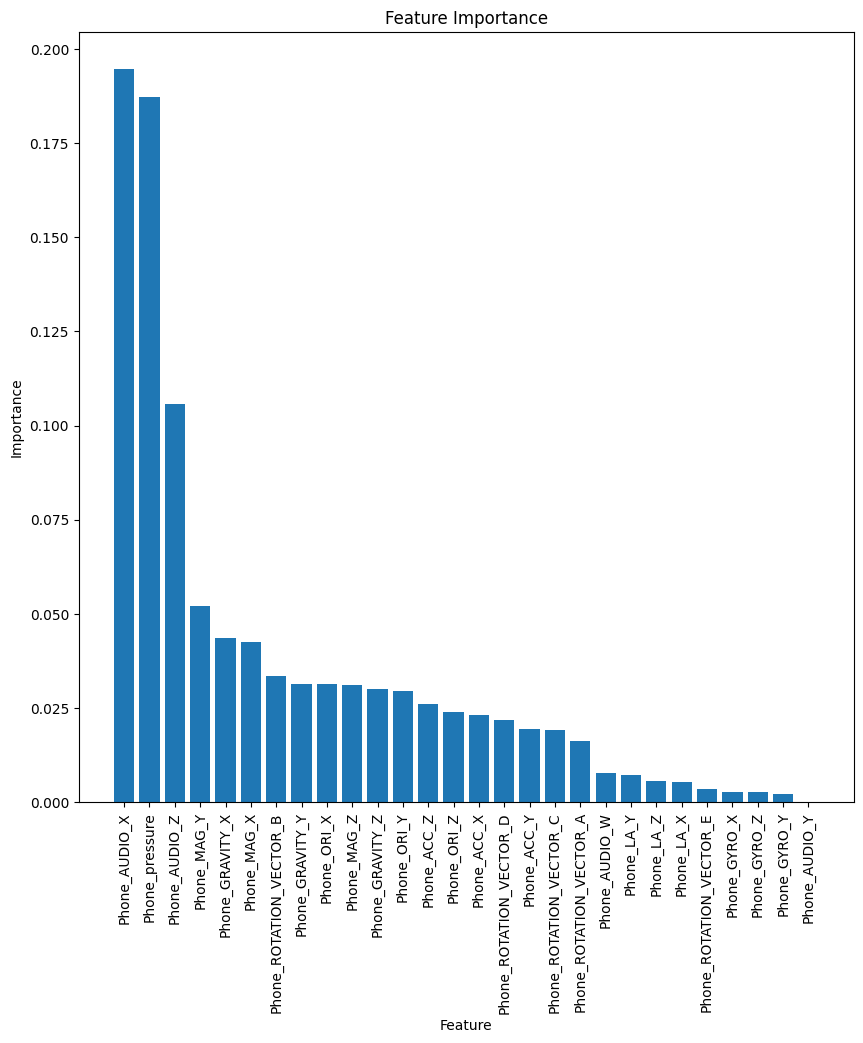

Index(['Phone_AUDIO_X', 'Phone_pressure', 'Phone_AUDIO_Z', 'Phone_MAG_Y',
       'Phone_GRAVITY_X', 'Phone_MAG_X', 'Phone_ROTATION_VECTOR_B',
       'Phone_GRAVITY_Y', 'Phone_ORI_X', 'Phone_MAG_Z', 'Phone_GRAVITY_Z',
       'Phone_ORI_Y', 'Phone_ACC_Z', 'Phone_ORI_Z', 'Phone_ACC_X',
       'Phone_ROTATION_VECTOR_D', 'Phone_ACC_Y', 'Phone_ROTATION_VECTOR_C',
       'Phone_ROTATION_VECTOR_A', 'Phone_AUDIO_W', 'Phone_LA_Y', 'Phone_LA_Z',
       'Phone_LA_X', 'Phone_ROTATION_VECTOR_E', 'Phone_GYRO_X', 'Phone_GYRO_Z',
       'Phone_GYRO_Y', 'Phone_AUDIO_Y'],
      dtype='object')

In [45]:
feature_importance(data_df, label_name='activity')

In [53]:
def find_pearson_correlation(X_train_parametric_df,parametric_continuous_features, figsize=(20, 20), threshold_correlation=0.5):

    fig, ax = plt.subplots(figsize=figsize)
    correlation = X_train_parametric_df[parametric_continuous_features].corr()
    plt.title("Heatmap-Correlation")
    sns.heatmap(correlation, annot=False
                , fmt=".2f", cmap="coolwarm")

    high_correlation_dict = {}

    for column in correlation.columns[2:]:
        correlated_columns = [col for col in correlation[column][(correlation[column] > threshold_correlation) | (correlation[column] < -threshold_correlation)].index.tolist()
                              if col != column]
        if correlated_columns:
            high_correlation_dict[column] = correlated_columns

    return correlation, high_correlation_dict

In [48]:
data_df.columns

Index(['Phone_pressure', 'Phone_ACC_X', 'Phone_ACC_Y', 'Phone_ACC_Z',
       'Phone_GRAVITY_X', 'Phone_GRAVITY_Y', 'Phone_GRAVITY_Z', 'Phone_GYRO_X',
       'Phone_GYRO_Y', 'Phone_GYRO_Z', 'Phone_LA_X', 'Phone_LA_Y',
       'Phone_LA_Z', 'Phone_MAG_X', 'Phone_MAG_Y', 'Phone_MAG_Z',
       'Phone_ORI_X', 'Phone_ORI_Y', 'Phone_ORI_Z', 'Phone_AUDIO_W',
       'Phone_AUDIO_X', 'Phone_AUDIO_Y', 'Phone_AUDIO_Z',
       'Phone_ROTATION_VECTOR_A', 'Phone_ROTATION_VECTOR_B',
       'Phone_ROTATION_VECTOR_C', 'Phone_ROTATION_VECTOR_D',
       'Phone_ROTATION_VECTOR_E', 'activity'],
      dtype='object')

In [49]:
features = ['Phone_pressure', 'Phone_ACC_X', 'Phone_ACC_Y', 'Phone_ACC_Z',
       'Phone_GRAVITY_X', 'Phone_GRAVITY_Y', 'Phone_GRAVITY_Z', 'Phone_GYRO_X',
       'Phone_GYRO_Y', 'Phone_GYRO_Z', 'Phone_LA_X', 'Phone_LA_Y',
       'Phone_LA_Z', 'Phone_MAG_X', 'Phone_MAG_Y', 'Phone_MAG_Z',
       'Phone_ORI_X', 'Phone_ORI_Y', 'Phone_ORI_Z', 'Phone_AUDIO_W',
       'Phone_AUDIO_X', 'Phone_AUDIO_Y', 'Phone_AUDIO_Z',
       'Phone_ROTATION_VECTOR_A', 'Phone_ROTATION_VECTOR_B',
       'Phone_ROTATION_VECTOR_C', 'Phone_ROTATION_VECTOR_D',
       'Phone_ROTATION_VECTOR_E']

In [51]:
X_train_parametric_df = pd.DataFrame(X_train_normalized, columns=features)
X_train_parametric_df

,Phone_pressure,Phone_ACC_X,Phone_ACC_Y,Phone_ACC_Z,Phone_GRAVITY_X,Phone_GRAVITY_Y,Phone_GRAVITY_Z,Phone_GYRO_X,Phone_GYRO_Y,Phone_GYRO_Z,...,Phone_ORI_Z,Phone_AUDIO_W,Phone_AUDIO_X,Phone_AUDIO_Y,Phone_AUDIO_Z,Phone_ROTATION_VECTOR_A,Phone_ROTATION_VECTOR_B,Phone_ROTATION_VECTOR_C,Phone_ROTATION_VECTOR_D,Phone_ROTATION_VECTOR_E
0,0.845214,0.825584,0.725808,0.575695,0.996971,0.556523,0.503374,0.502819,0.447111,0.583594,...,0.250494,0.080386,0.736451,1.0,0.000244,0.151226,0.430630,0.152268,0.121961,0.0
1,0.856067,0.813348,0.672980,0.557071,0.948164,0.297964,0.410749,0.502840,0.447138,0.583874,...,0.214615,0.014649,0.694021,1.0,0.000244,0.123289,0.515120,0.192776,0.241929,0.0
2,0.545265,0.812962,0.731793,0.535054,0.937169,0.576487,0.269202,0.502815,0.447272,0.583937,...,0.177155,0.329295,0.955464,1.0,0.000519,0.473929,0.072307,0.441339,0.506538,0.0
3,0.218482,0.776332,0.744825,0.503714,0.763387,0.661172,0.106027,0.502822,0.447240,0.583760,...,0.091361,0.018372,0.375982,1.0,0.000458,0.956957,0.380344,0.621477,0.223762,1.0
4,0.582248,0.753484,0.703656,0.558901,0.663821,0.446454,0.400872,0.502835,0.447199,0.583785,...,0.256375,0.074923,0.421266,1.0,0.000214,0.311706,0.436658,0.476734,0.241938,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230691,0.386173,0.752840,0.613208,0.617680,0.475036,0.025687,0.656033,0.415867,0.345250,0.491607,...,0.751328,1.000000,0.424651,1.0,0.000458,0.361423,0.834775,0.156542,0.092848,0.0
230692,0.497096,0.701734,0.605772,0.553942,0.381067,0.048517,0.321228,0.515300,0.452543,0.550027,...,0.845308,1.000000,0.396810,1.0,0.000000,0.308080,0.826297,0.254831,0.439834,0.0
230693,0.685435,0.792432,0.641216,0.572764,0.858501,0.152549,0.479835,0.502367,0.447469,0.583619,...,0.239768,0.016785,0.157769,1.0,0.000000,0.604979,0.150456,0.800140,0.331405,0.0
230694,0.544474,0.736534,0.613545,0.585811,0.562759,0.009717,0.575054,0.502618,0.448498,0.584073,...,0.244423,0.058535,0.975098,1.0,0.000519,0.316312,0.769047,0.162768,0.357353,0.0


(                         Phone_pressure  Phone_ACC_X  Phone_ACC_Y  \
 Phone_pressure                 1.000000     0.085134     0.172986   
 Phone_ACC_X                    0.085134     1.000000     0.190959   
 Phone_ACC_Y                    0.172986     0.190959     1.000000   
 Phone_ACC_Z                    0.094650     0.098646    -0.193317   
 Phone_GRAVITY_X                0.092537     0.915598     0.194309   
 Phone_GRAVITY_Y                0.187551     0.212650     0.920153   
 Phone_GRAVITY_Z                0.101389     0.109785    -0.194640   
 Phone_GYRO_X                   0.000644     0.026725     0.017820   
 Phone_GYRO_Y                  -0.007176     0.037680     0.027383   
 Phone_GYRO_Z                   0.000131    -0.025787     0.074521   
 Phone_LA_X                    -0.004622     0.059284     0.035689   
 Phone_LA_Y                    -0.019266    -0.007392     0.014075   
 Phone_LA_Z                    -0.001161    -0.046119    -0.067662   
 Phone_MAG_X        

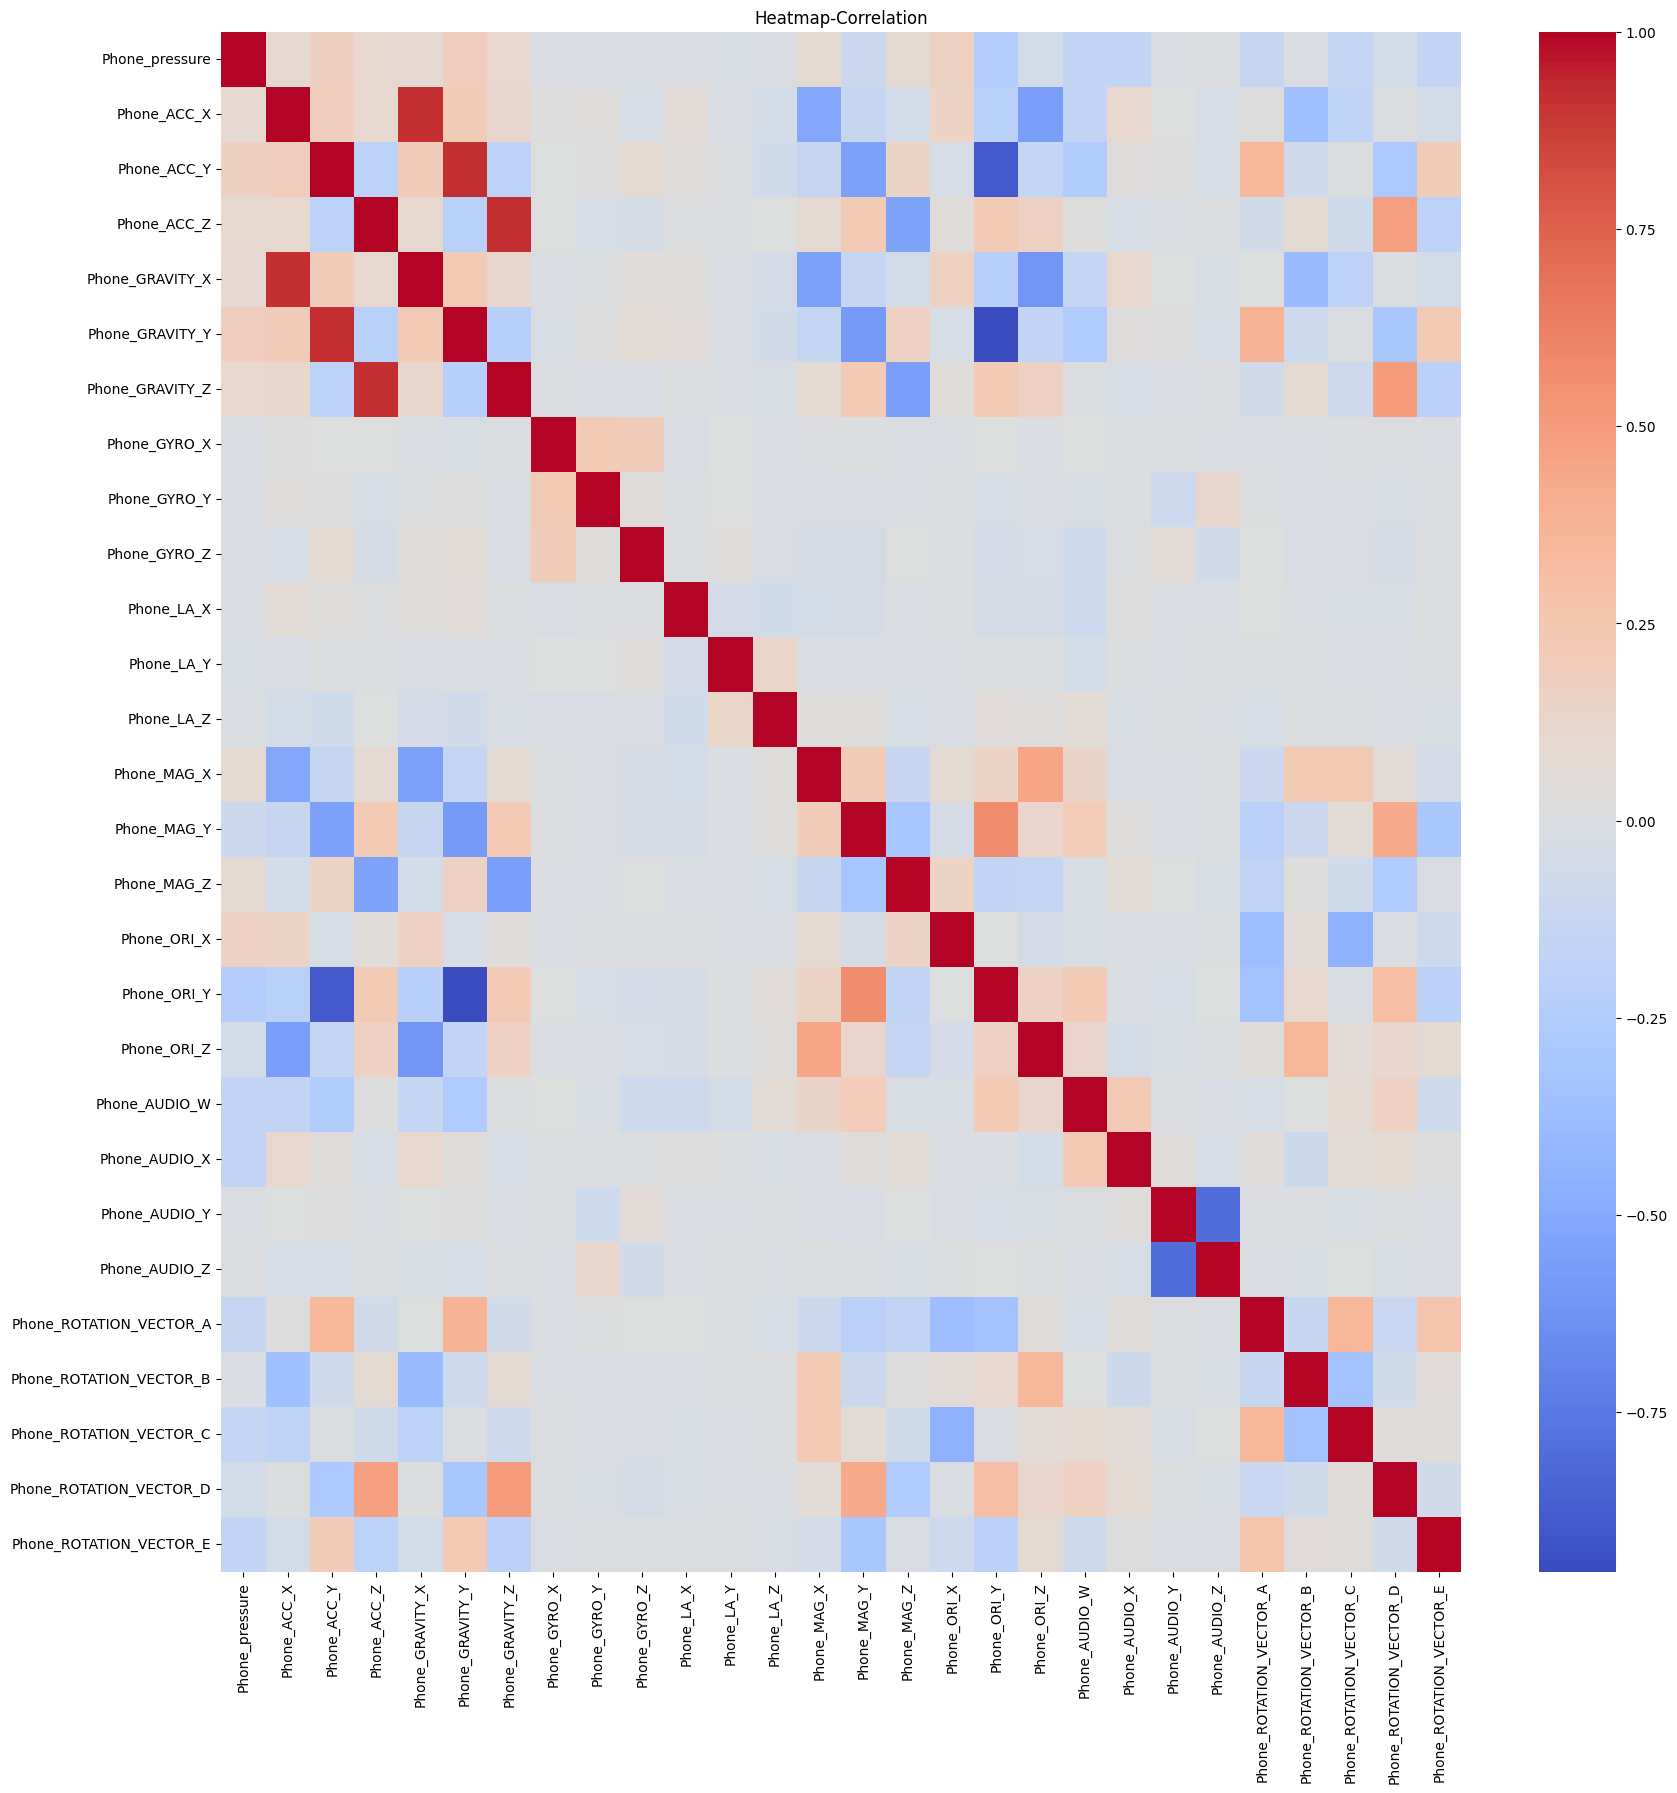

In [54]:
find_pearson_correlation(X_train_parametric_df,parametric_continuous_features=features, figsize=(20, 20), threshold_correlation=0.5)